# Generalized lineal model

In [16]:

#import machine_learning_fundamentals.utils.paths as path
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #to divide the data
from sklearn import preprocessing
from scipy import stats
import pingouin as pg

In [15]:
#!pip install pingouin 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 104.0 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196190 sha256=a8434f1f64b6a51ef43cccc6bed01b67a575f94ec5117211622dfadf2c39cba5
  Stored in directory: /home/alejandrodf1/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=ddfc9aaf28f3ae715c1d424c4021e3cf0de2ea6fc27a8342cdb17cdf53c180b4
  Stored in directory: /home/alejandrodf1/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [78]:
data = pd.read_csv('/home/alejandrodf1/Documents/radon_project/radon_project/data/raw/radon11_n.csv', sep=';')  #we get the data

In [73]:
data.head()

,Casa,house_code,hour,day,Hora,[]_RADON_(pCi/L),[]_RADON_(Bq/m3),effective_dose_[mSv/y],20_hours_effective_dose_[mSv],Temperatura_(C),clima,age,ventilacion,time_period
0,pat 37,P-01,1.0,03/08/2022,10:00:00,0.70,25.90,0.44030,0.459170,23.8,soleado,old,medium,morning
1,pat 37,P-01,2.0,03/08/2022,11:00:00,0.72,26.64,0.45288,0.472289,23.8,soleado,old,medium,morning
2,pat 37,P-01,3.0,03/08/2022,12:00:00,0.67,24.79,0.42143,0.439491,21.1,soleado,old,medium,afternoon
3,pat 37,P-01,4.0,03/08/2022,13:00:00,0.64,23.68,0.40256,0.419813,21.2,Soleado,old,medium,afternoon
4,pat 37,P-01,5.0,03/08/2022,14:00:00,0.70,25.90,0.44030,0.459170,21.3,Soleado,old,medium,afternoon


# T student and dose response graph

<AxesSubplot:xlabel='hour', ylabel='effective_dose_[mSv/y]'>

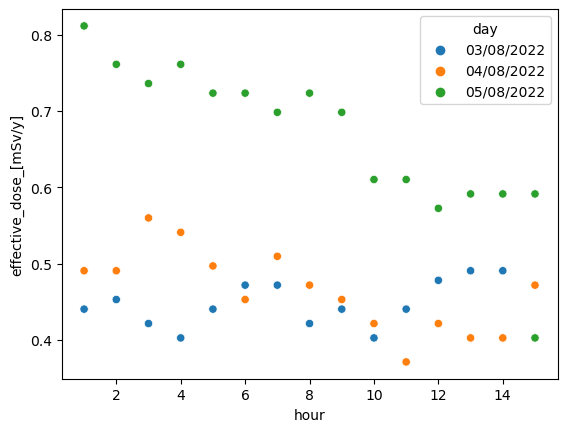

In [31]:
pat_37 = data[(data['Casa']=='pat 37')]
pat_37 = pd.DataFrame(pat_37)
sns.scatterplot(data=pat_37, x = 'hour', y = 'effective_dose_[mSv/y]',hue = 'day')

In [45]:
#effective_d = data.loc[data.house_code == 'P-01', data.day == '03/8/2022', 'effective_dose_[mSv/y]']
pat_37
effective_d = data.loc[data.house_code == 'P-01', 'effective_dose_[mSv/y]']
#time_h = data.loc[data.house_code == 'P-01', data.day == '04/8/2022', 'effective_dose_[mSv/y]']
#time_h
effective_d[0:15]

0     0.44030
1     0.45288
2     0.42143
3     0.40256
4     0.44030
5     0.47175
6     0.47175
7     0.42143
8     0.44030
9     0.40256
10    0.44030
11    0.47804
12    0.49062
13    0.49062
14    0.47175
Name: effective_dose_[mSv/y], dtype: float64

In [52]:
#effective_d2 = effective_d[15:30]
#effective_d2 
#effective_d3 = effective_d[30:47]
#effective_d3

### t student para casa P-01

In [50]:
effective_d = data.loc[data.house_code == 'P-01', 'effective_dose_[mSv/y]']
time_h = data.loc[data.house_code == 'P-01', 'effective_dose_[mSv/y]']
effective_d1 = effective_d[0:15]
effective_d2 = effective_d[15:30]
effective_d3 = effective_d[30:47]



print(pg.ttest(x=effective_d1, y=effective_d2, alternative='two-sided', correction=False))
print(pg.ttest(x=effective_d1, y=effective_d3, alternative='two-sided', correction=False))
print(pg.ttest(x=effective_d2, y=effective_d3, alternative='two-sided', correction=False))

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -0.620653   28   two-sided  0.539847  [-0.04, 0.02]  0.226631  0.399   

         power  
T-test  0.0921  
                T  dof alternative         p-val           CI95%   cohen-d  \
T-test -10.760276   28   two-sided  1.863637e-11  [-0.28, -0.19]  3.929097   

             BF10  power  
T-test  2.757e+08    1.0  
               T  dof alternative         p-val           CI95%   cohen-d  \
T-test -8.950404   28   two-sided  1.048937e-09  [-0.27, -0.17]  3.268225   

             BF10  power  
T-test  6.351e+06    1.0  


## t student para P-02

In [71]:
#effective_d = data.loc[data.house_code == 'P-01', 'age']

KeyError: 'age'

In [51]:
effective_d = data.loc[data.house_code == 'P-02', 'effective_dose_[mSv/y]']
time_h = data.loc[data.house_code == 'P-02', 'effective_dose_[mSv/y]']
effective_d1 = effective_d[0:15]
effective_d2 = effective_d[15:30]
effective_d3 = effective_d[30:47]



print(pg.ttest(x=effective_d1, y=effective_d2, alternative='two-sided', correction=False))
print(pg.ttest(x=effective_d1, y=effective_d3, alternative='two-sided', correction=False))
print(pg.ttest(x=effective_d2, y=effective_d3, alternative='two-sided', correction=False))

               T  dof alternative         p-val           CI95%   cohen-d  \
T-test -7.187012   28   two-sided  8.023544e-08  [-0.13, -0.07]  2.624326   

             BF10  power  
T-test  1.164e+05    1.0  
              T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -1.41325   28   two-sided  0.168603  [-0.05, 0.01]  0.516046  0.726   

           power  
T-test  0.276367  
                T  dof alternative         p-val        CI95%  cohen-d  \
T-test  10.230279   28   two-sided  5.808779e-11  [0.06, 0.1]  3.73557   

            BF10  power  
T-test  9.48e+07    1.0  


<AxesSubplot:xlabel='hour', ylabel='effective dose [mSv/y]'>

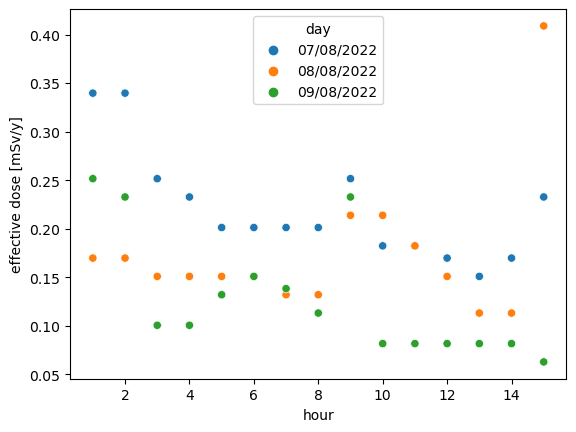

In [8]:
bloque_A4 = data[(data['Casa']=='A')]
sns.scatterplot(data=bloque_A4, x = 'hour', y = 'effective dose [mSv/y]',hue = 'day')

In [ ]:
pat_28 = data[(data['Casa']=='PAT 28')]

In [ ]:
pat_32 = data[(data['Casa']=='PAT 32')]

In [ ]:
pat_33 = data[(data['Casa']=='PAT 33')]

In [ ]:
pat_1 = data[(data['Casa']=='PAT 1')]

# Colapsing data for lineal model

# Lineal model

In [82]:
age_build = data['age']
ventilation = data['ventilacion']
time_interval = data['time_period']

In [83]:
#convert categorical variables into number
#countries = ['EC','CO','BR','MX'] # countries

age_build = data['age']

#label encoder to change countries in numbers
encoder = preprocessing.LabelEncoder()
agebuild_encoded = encoder.fit_transform(age_build)

#create 30 elements for the dataset
age_elements = [random.choice(agebuild_encoded) for i in range(len(data))]
data['age_elements'] = age_elements


In [85]:
ventilation = data['ventilacion']

encoder = preprocessing.LabelEncoder()
ventilation_encoded = encoder.fit_transform(ventilation)

#create 30 elements for the dataset
ventilation_elements = [random.choice(ventilation_encoded) for i in range(len(data))]
data['ventilation_elements'] = ventilation_elements


In [86]:
time_interval = data['time_period']

encoder = preprocessing.LabelEncoder()
timei_encoded = encoder.fit_transform(time_interval)

#create 30 elements for the dataset
timei_elements = [random.choice(timei_encoded) for i in range(len(data))]
data['timei_elements'] = timei_elements


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [ ]:
logreg = LogisticRegression(max_iter=len(X_train))
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)